In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/data/iris.csv") #데이터 파일 로딩
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
df.columns #필드 목록

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [3]:
df.shape #데이터셋의 형태

(150, 6)

In [4]:
df.describe() #기초 통계량

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df["Name"].unique() #품종 이름

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.groupby("Name").mean() #품종별 평균값

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Name,,,,,
setosa,5.006,3.418,1.464,0.244,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


In [7]:
df["Name"].value_counts() #품종별 샘플수

versicolor    50
setosa        50
virginica     50
Name: Name, dtype: int64

Text(0.5, 1.0, '분류\n(0:setosa, 1:versicolor, 2:virginica)')

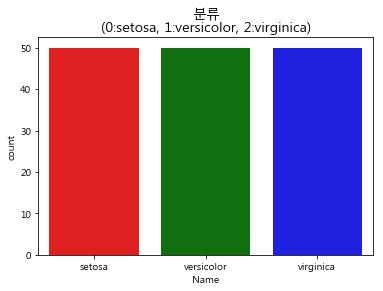

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)
colors=["red","green","blue"]
sns.countplot("Name",data=df,palette=colors) #카운트플롯
plt.title("분류\n(0:setosa, 1:versicolor, 2:virginica)",fontsize=14)

In [9]:
cols=["SepalLength","SepalWidth","PetalLength","PetalWidth"]
X=df[cols] #독립변수
y=df["Species"] #종속변수

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC274A8>,
      dtype=object)

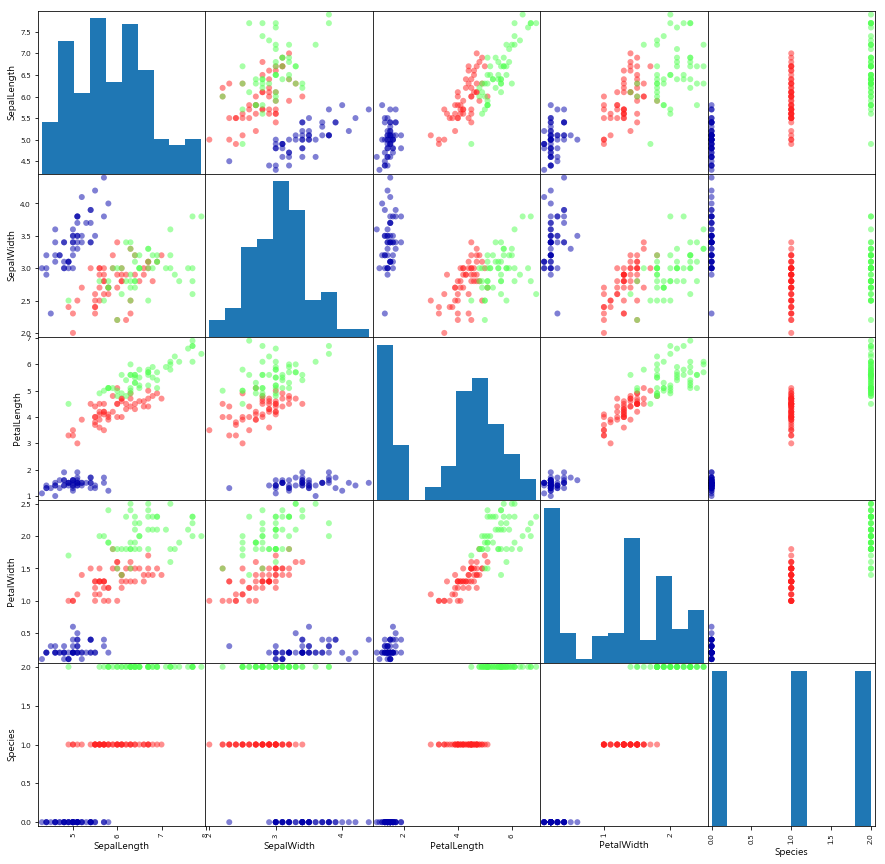

In [10]:
#산점도 행렬
import mglearn
pd.plotting.scatter_matrix(df,c=y,figsize=(15,15),marker="o",
                          cmap=mglearn.cm3)

In [11]:
from sklearn.model_selection import train_test_split
#데이터셋을 학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=0)

In [12]:
from sklearn.svm import SVC
#svm 모형 생성
model=SVC(random_state=10)
model.fit(X_train,y_train) #학습용 데이터셋을 입력하여 모형 훈련

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
import numpy as np
pred=model.predict(X_test) #예측값
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(np.mean(pred==y_test))

0.9666666666666667
1.0
1.0
